In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Input')
Output = ('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.2_Cytokine Distribution Analyses/Output')
cur_date = '011820'

library("readxl")
library(tidyverse)
library(MASS)
#library(reshape2)
library(car) #package necessary to run anova and specify type III errors
#library("multcomp") #for Tukey's post hoc
#library(rstatix)

#reading in file
data_df <- data.frame(read_excel("CytokineData_102920.xlsx", sheet = 2))

#reading in demographics file
demographics_data_df = data.frame(read_excel("SubjectInfo_102920.xlsx", sheet = 2))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [2]:
#adding demographics data to cytokine df
#could've made my life easier by just using full_join but didn't need every column from the demographics data set
race = c()
ethnicity = c()
sex = c()
age = c()
BMI = c()
for (i in 1:length(data_df$SubjectNo)){
    for(j in 1:length(demographics_data_df$SubjectNo)){
        if (data_df$SubjectNo[i] == demographics_data_df$SubjectNo[j]){
            race = c(race, demographics_data_df$Race[j])
            ethnicity = c(ethnicity, demographics_data_df$Ethnicity[j])
            sex = c(sex, demographics_data_df$Sex[j])
            age = c(age, demographics_data_df$Age[j])
            BMI = c(BMI, demographics_data_df$BMI[j])
        }
    }
}

data_df$Race = race
data_df$Ethnicity = ethnicity
data_df$Sex = sex
data_df$Age = age
data_df$BMI = BMI

In [3]:
#making race binary between white and non-white subjects
for (i in 1:length(data_df$Race)){
    if(data_df$Race[i] != 'W'){
        data_df$Race[i] = 'NW'
    }
}

In [4]:
head(data_df)

,Original_Identifier,Protein,Conc,Conc_pslog2,Compartment,SubjectNo,Group,SubjectID,Race,Ethnicity,Sex,Age,BMI
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,E_C_F_002,IFNg,17.642316,4.220509,ELF,1,NS,NS_1,W,NH,F,28,37.67
2,E_C_F_002,IL10,2.873724,1.953721,ELF,1,NS,NS_1,W,NH,F,28,37.67
3,E_C_F_002,IL12p70,1.625272,1.392467,ELF,1,NS,NS_1,W,NH,F,28,37.67
4,E_C_F_002,IL13,36.117692,5.214035,ELF,1,NS,NS_1,W,NH,F,28,37.67
5,E_C_F_002,IL1b,104.409217,6.719857,ELF,1,NS,NS_1,W,NH,F,28,37.67
6,E_C_F_002,IL6,21.159536,4.469856,ELF,1,NS,NS_1,W,NH,F,28,37.67


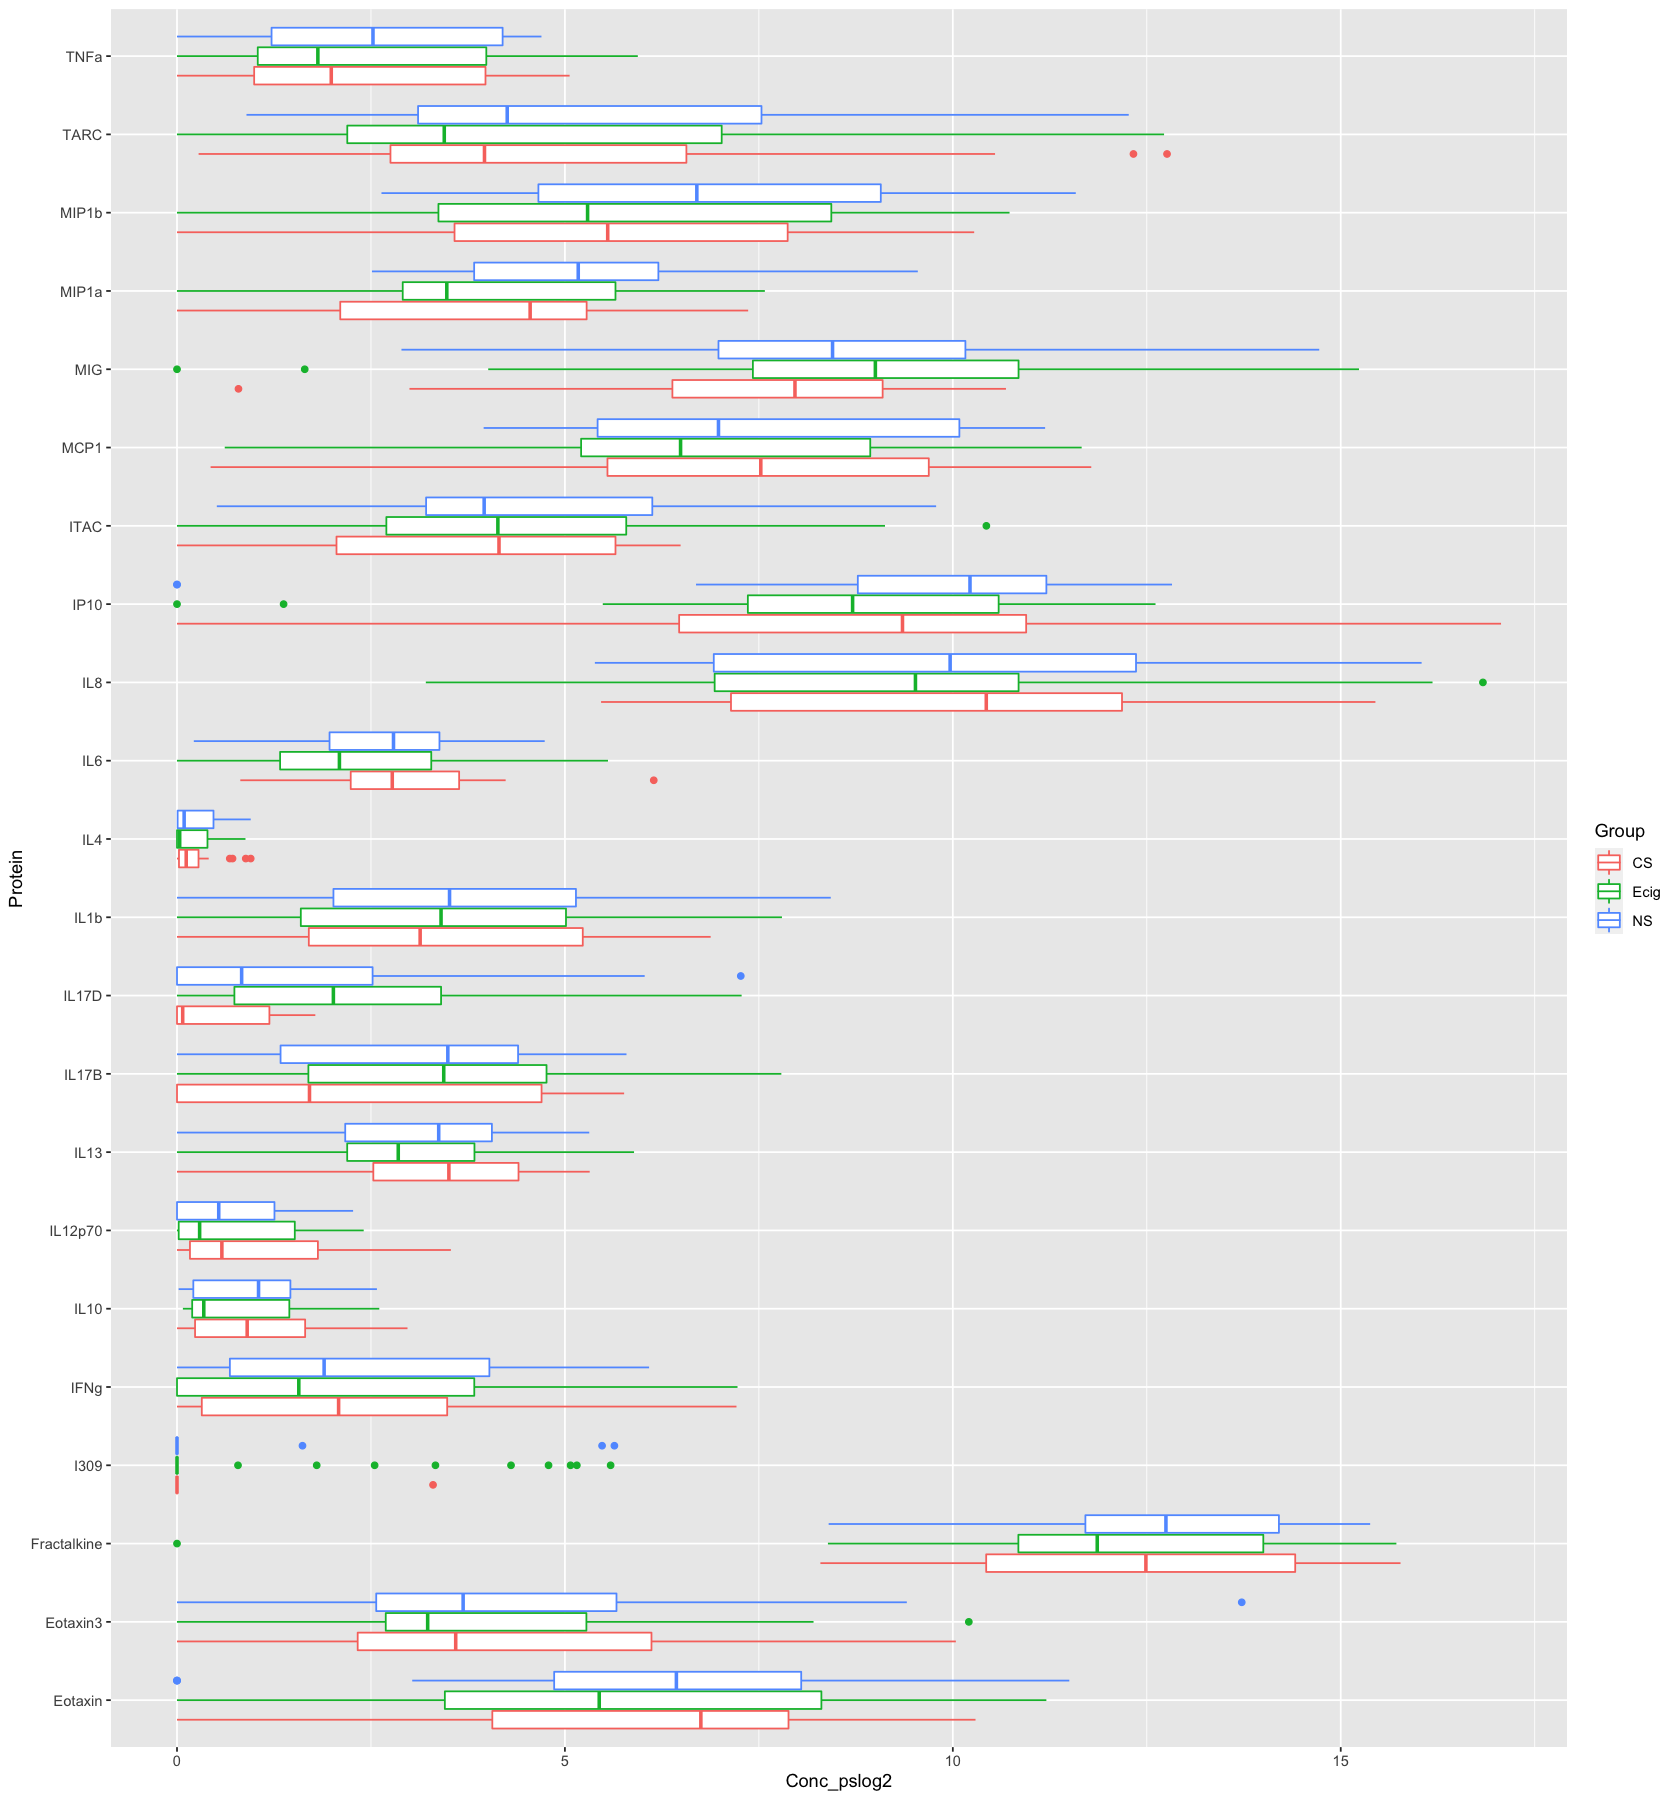

In [5]:
options(repr.plot.width=14, repr.plot.height=15) #changing size
ggplot(data = data_df %>%
       filter(Sex =='M'), aes(x = Conc_pslog2, y = Protein, color = Group)) +
  geom_boxplot() #+ 
  #geom_point(alpha = 0.5, position = position_jitter(h = 0.2, w = 0))

In [ ]:
#say something about OLR

In [5]:
#creating a df for each cytokine within each compartment
#NLF
Eotaxin_NLF = data_df %>% filter(Protein == 'Eotaxin', Compartment == 'NLF')
Eotaxin3_NLF = data_df %>% filter(Protein == 'Eotaxin3', Compartment == 'NLF')
Fractalkine_NLF = data_df %>% filter(Protein == 'Fractalkine', Compartment == 'NLF')
I309_NLF = data_df %>% filter(Protein == 'I309', Compartment == 'NLF')
IFNg_NLF = data_df %>% filter(Protein == 'IFNg', Compartment == 'NLF')
IL10_NLF = data_df %>% filter(Protein == 'IL10', Compartment == 'NLF')
IL12p70_NLF = data_df %>% filter(Protein == 'IL12p70', Compartment == 'NLF')
IL13_NLF = data_df %>% filter(Protein == 'IL13', Compartment == 'NLF')
IL17B_NLF = data_df %>% filter(Protein == 'IL17B', Compartment == 'NLF')
IL17D_NLF = data_df %>% filter(Protein == 'IL17D', Compartment == 'NLF')
IL1b_NLF = data_df %>% filter(Protein == 'IL1b', Compartment == 'NLF')
IL4_NLF = data_df %>% filter(Protein == 'IL4', Compartment == 'NLF')
IL6_NLF = data_df %>% filter(Protein == 'IL6', Compartment == 'NLF')
IL8_NLF = data_df %>% filter(Protein == 'IL8', Compartment == 'NLF')
IP10_NLF = data_df %>% filter(Protein == 'IP10', Compartment == 'NLF')
ITAC_NLF = data_df %>% filter(Protein == 'ITAC', Compartment == 'NLF')
MCP1_NLF = data_df %>% filter(Protein == 'MCP1', Compartment == 'NLF')
MIG_NLF = data_df %>% filter(Protein == 'MIG', Compartment == 'NLF')
MIP1a_NLF = data_df %>% filter(Protein == 'MIP1a', Compartment == 'NLF')
MIP1b_NLF = data_df %>% filter(Protein == 'MIP1b', Compartment == 'NLF')
TARC_NLF = data_df %>% filter(Protein == 'TARC', Compartment == 'NLF')
TNFa_NLF = data_df %>% filter(Protein == 'TNFa', Compartment == 'NLF')

#ELF
Eotaxin_ELF = data_df %>% filter(Protein == 'Eotaxin', Compartment == 'ELF')
Eotaxin3_ELF = data_df %>% filter(Protein == 'Eotaxin3', Compartment == 'ELF')
Fractalkine_ELF = data_df %>% filter(Protein == 'Fractalkine', Compartment == 'ELF')
I309_ELF = data_df %>% filter(Protein == 'I309', Compartment == 'ELF')
IFNg_ELF = data_df %>% filter(Protein == 'IFNg', Compartment == 'ELF')
IL10_ELF = data_df %>% filter(Protein == 'IL10', Compartment == 'ELF')
IL12p70_ELF = data_df %>% filter(Protein == 'IL12p70', Compartment == 'ELF')
IL13_ELF = data_df %>% filter(Protein == 'IL13', Compartment == 'ELF')
IL17B_ELF = data_df %>% filter(Protein == 'IL17B', Compartment == 'ELF')
IL17D_ELF = data_df %>% filter(Protein == 'IL17D', Compartment == 'ELF')
IL1b_ELF = data_df %>% filter(Protein == 'IL1b', Compartment == 'ELF')
IL4_ELF = data_df %>% filter(Protein == 'IL4', Compartment == 'ELF')
IL6_ELF = data_df %>% filter(Protein == 'IL6', Compartment == 'ELF')
IL8_ELF = data_df %>% filter(Protein == 'IL8', Compartment == 'ELF')
IP10_ELF = data_df %>% filter(Protein == 'IP10', Compartment == 'ELF')
ITAC_ELF = data_df %>% filter(Protein == 'ITAC', Compartment == 'ELF')
MCP1_ELF = data_df %>% filter(Protein == 'MCP1', Compartment == 'ELF')
MIG_ELF = data_df %>% filter(Protein == 'MIG', Compartment == 'ELF')
MIP1a_ELF = data_df %>% filter(Protein == 'MIP1a', Compartment == 'ELF')
MIP1b_ELF = data_df %>% filter(Protein == 'MIP1b', Compartment == 'ELF')
TARC_ELF = data_df %>% filter(Protein == 'TARC', Compartment == 'ELF')
TNFa_ELF = data_df %>% filter(Protein == 'TNFa', Compartment == 'ELF')

#Sputum
Eotaxin_Sputum = data_df %>% filter(Protein == 'Eotaxin', Compartment == 'Sputum')
Eotaxin3_Sputum = data_df %>% filter(Protein == 'Eotaxin3', Compartment == 'Sputum')
Fractalkine_Sputum = data_df %>% filter(Protein == 'Fractalkine', Compartment == 'Sputum')
I309_Sputum = data_df %>% filter(Protein == 'I309', Compartment == 'Sputum')
IFNg_Sputum = data_df %>% filter(Protein == 'IFNg', Compartment == 'Sputum')
IL10_Sputum = data_df %>% filter(Protein == 'IL10', Compartment == 'Sputum')
IL12p70_Sputum = data_df %>% filter(Protein == 'IL12p70', Compartment == 'Sputum')
IL13_Sputum = data_df %>% filter(Protein == 'IL13', Compartment == 'Sputum')
IL17B_Sputum = data_df %>% filter(Protein == 'IL17B', Compartment == 'Sputum')
IL17D_Sputum = data_df %>% filter(Protein == 'IL17D', Compartment == 'Sputum')
IL1b_Sputum = data_df %>% filter(Protein == 'IL1b', Compartment == 'Sputum')
IL4_Sputum = data_df %>% filter(Protein == 'IL4', Compartment == 'Sputum')
IL6_Sputum = data_df %>% filter(Protein == 'IL6', Compartment == 'Sputum')
IL8_Sputum = data_df %>% filter(Protein == 'IL8', Compartment == 'Sputum')
IP10_Sputum = data_df %>% filter(Protein == 'IP10', Compartment == 'Sputum')
ITAC_Sputum = data_df %>% filter(Protein == 'ITAC', Compartment == 'Sputum')
MCP1_Sputum = data_df %>% filter(Protein == 'MCP1', Compartment == 'Sputum')
MIG_Sputum = data_df %>% filter(Protein == 'MIG', Compartment == 'Sputum')
MIP1a_Sputum = data_df %>% filter(Protein == 'MIP1a', Compartment == 'Sputum')
MIP1b_Sputum = data_df %>% filter(Protein == 'MIP1b', Compartment == 'Sputum')
TARC_Sputum = data_df %>% filter(Protein == 'TARC', Compartment == 'Sputum')
TNFa_Sputum = data_df %>% filter(Protein == 'TNFa', Compartment == 'Sputum')

#Serum
Eotaxin_Serum = data_df %>% filter(Protein == 'Eotaxin', Compartment == 'Serum')
Eotaxin3_Serum = data_df %>% filter(Protein == 'Eotaxin3', Compartment == 'Serum')
Fractalkine_Serum = data_df %>% filter(Protein == 'Fractalkine', Compartment == 'Serum')
I309_Serum = data_df %>% filter(Protein == 'I309', Compartment == 'Serum')
IFNg_Serum = data_df %>% filter(Protein == 'IFNg', Compartment == 'Serum')
IL10_Serum = data_df %>% filter(Protein == 'IL10', Compartment == 'Serum')
IL12p70_Serum = data_df %>% filter(Protein == 'IL12p70', Compartment == 'Serum')
IL13_Serum = data_df %>% filter(Protein == 'IL13', Compartment == 'Serum')
IL17B_Serum = data_df %>% filter(Protein == 'IL17B', Compartment == 'Serum')
IL17D_Serum = data_df %>% filter(Protein == 'IL17D', Compartment == 'Serum')
IL1b_Serum = data_df %>% filter(Protein == 'IL1b', Compartment == 'Serum')
IL4_Serum = data_df %>% filter(Protein == 'IL4', Compartment == 'Serum')
IL6_Serum = data_df %>% filter(Protein == 'IL6', Compartment == 'Serum')
IL8_Serum = data_df %>% filter(Protein == 'IL8', Compartment == 'Serum')
IP10_Serum = data_df %>% filter(Protein == 'IP10', Compartment == 'Serum')
ITAC_Serum = data_df %>% filter(Protein == 'ITAC', Compartment == 'Serum')
MCP1_Serum = data_df %>% filter(Protein == 'MCP1', Compartment == 'Serum')
MIG_Serum = data_df %>% filter(Protein == 'MIG', Compartment == 'Serum')
MIP1a_Serum = data_df %>% filter(Protein == 'MIP1a', Compartment == 'Serum')
MIP1b_Serum = data_df %>% filter(Protein == 'MIP1b', Compartment == 'Serum')
TARC_Serum = data_df %>% filter(Protein == 'TARC', Compartment == 'Serum')
TNFa_Serum = data_df %>% filter(Protein == 'TNFa', Compartment == 'Serum')

In [7]:
#formatting data to be put into the anova function 
change_data_types = function(scaled_df){
    #making compartment, smoking status, and covariates into factors
    scaled_df$Compartment = factor(scaled_df$Compartment, labels = c(unique(scaled_df$Compartment)))
    scaled_df$Group = factor(scaled_df$Group, labels = c(unique(scaled_df$Group)))
    scaled_df$Race = factor(scaled_df$Race, labels = c(unique(scaled_df$Race)))

    return(scaled_df)
}

#calling fn
#NLF
Eotaxin_factored_NLF = change_data_types(Eotaxin_NLF)
Eotaxin3_factored_NLF = change_data_types(Eotaxin3_NLF)
Fractalkine_factored_NLF = change_data_types(Fractalkine_NLF)
I309_factored_NLF = change_data_types(I309_NLF)
IFNg_factored_NLF = change_data_types(IFNg_NLF)
IL10_factored_NLF = change_data_types(IL10_NLF)
IL12p70_factored_NLF = change_data_types(IL12p70_NLF)
IL13_factored_NLF = change_data_types(IL13_NLF)
IL17B_factored_NLF = change_data_types(IL17B_NLF)
IL17D_factored_NLF = change_data_types(IL17D_NLF)
IL1b_factored_NLF = change_data_types(IL1b_NLF)
IL4_factored_NLF = change_data_types(IL4_NLF)
IL6_factored_NLF = change_data_types(IL6_NLF)
IL8_factored_NLF = change_data_types(IL8_NLF)
IP10_factored_NLF = change_data_types(IP10_NLF)
ITAC_factored_NLF = change_data_types(ITAC_NLF)
MCP1_factored_NLF = change_data_types(MCP1_NLF)
MIG_factored_NLF = change_data_types(MIG_NLF)
MIP1a_factored_NLF = change_data_types(MIP1a_NLF)
MIP1b_factored_NLF = change_data_types(MIP1b_NLF)
TARC_factored_NLF = change_data_types(TARC_NLF)
TNFa_factored_NLF = change_data_types(TNFa_NLF)

#ELF
Eotaxin_factored_ELF = change_data_types(Eotaxin_ELF)
Eotaxin3_factored_ELF = change_data_types(Eotaxin3_ELF)
Fractalkine_factored_ELF = change_data_types(Fractalkine_ELF)
I309_factored_ELF = change_data_types(I309_ELF)
IFNg_factored_ELF = change_data_types(IFNg_ELF)
IL10_factored_ELF = change_data_types(IL10_ELF)
IL12p70_factored_ELF = change_data_types(IL12p70_ELF)
IL13_factored_ELF = change_data_types(IL13_ELF)
IL17B_factored_ELF = change_data_types(IL17B_ELF)
IL17D_factored_ELF = change_data_types(IL17D_ELF)
IL1b_factored_ELF = change_data_types(IL1b_ELF)
IL4_factored_ELF = change_data_types(IL4_ELF)
IL6_factored_ELF = change_data_types(IL6_ELF)
IL8_factored_ELF = change_data_types(IL8_ELF)
IP10_factored_ELF = change_data_types(IP10_ELF)
ITAC_factored_ELF = change_data_types(ITAC_ELF)
MCP1_factored_ELF = change_data_types(MCP1_ELF)
MIG_factored_ELF = change_data_types(MIG_ELF)
MIP1a_factored_ELF = change_data_types(MIP1a_ELF)
MIP1b_factored_ELF = change_data_types(MIP1b_ELF)
TARC_factored_ELF = change_data_types(TARC_ELF)
TNFa_factored_ELF = change_data_types(TNFa_ELF)

#Sputum
Eotaxin_factored_Sputum = change_data_types(Eotaxin_Sputum)
Eotaxin3_factored_Sputum = change_data_types(Eotaxin3_Sputum)
Fractalkine_factored_Sputum = change_data_types(Fractalkine_Sputum)
I309_factored_Sputum = change_data_types(I309_Sputum)
IFNg_factored_Sputum = change_data_types(IFNg_Sputum)
IL10_factored_Sputum = change_data_types(IL10_Sputum)
IL12p70_factored_Sputum = change_data_types(IL12p70_Sputum)
IL13_factored_Sputum = change_data_types(IL13_Sputum)
IL17B_factored_Sputum = change_data_types(IL17B_Sputum)
IL17D_factored_Sputum = change_data_types(IL17D_Sputum)
IL1b_factored_Sputum = change_data_types(IL1b_Sputum)
IL4_factored_Sputum = change_data_types(IL4_Sputum)
IL6_factored_Sputum = change_data_types(IL6_Sputum)
IL8_factored_Sputum = change_data_types(IL8_Sputum)
IP10_factored_Sputum = change_data_types(IP10_Sputum)
ITAC_factored_Sputum = change_data_types(ITAC_Sputum)
MCP1_factored_Sputum = change_data_types(MCP1_Sputum)
MIG_factored_Sputum = change_data_types(MIG_Sputum)
MIP1a_factored_Sputum = change_data_types(MIP1a_Sputum)
MIP1b_factored_Sputum = change_data_types(MIP1b_Sputum)
TARC_factored_Sputum = change_data_types(TARC_Sputum)
TNFa_factored_Sputum = change_data_types(TNFa_Sputum)

#Serum
Eotaxin_factored_Serum = change_data_types(Eotaxin_Serum)
Eotaxin3_factored_Serum = change_data_types(Eotaxin3_Serum)
Fractalkine_factored_Serum = change_data_types(Fractalkine_Serum)
I309_factored_Serum = change_data_types(I309_Serum)
IFNg_factored_Serum = change_data_types(IFNg_Serum)
IL10_factored_Serum = change_data_types(IL10_Serum)
IL12p70_factored_Serum = change_data_types(IL12p70_Serum)
IL13_factored_Serum = change_data_types(IL13_Serum)
IL17B_factored_Serum = change_data_types(IL17B_Serum)
IL17D_factored_Serum = change_data_types(IL17D_Serum)
IL1b_factored_Serum = change_data_types(IL1b_Serum)
IL4_factored_Serum = change_data_types(IL4_Serum)
IL6_factored_Serum = change_data_types(IL6_Serum)
IL8_factored_Serum = change_data_types(IL8_Serum)
IP10_factored_Serum = change_data_types(IP10_Serum)
ITAC_factored_Serum = change_data_types(ITAC_Serum)
MCP1_factored_Serum = change_data_types(MCP1_Serum)
MIG_factored_Serum = change_data_types(MIG_Serum)
MIP1a_factored_Serum = change_data_types(MIP1a_Serum)
MIP1b_factored_Serum = change_data_types(MIP1b_Serum)
TARC_factored_Serum = change_data_types(TARC_Serum)
TNFa_factored_Serum = change_data_types(TNFa_Serum)

# Proportional Odds Logistic Regression

In [16]:
m = polr(Group~Conc_pslog2,data = Eotaxin_factored_NLF)
mtable = coef(summary(m))
p <- pnorm(abs(mtable[, "t value"]), lower.tail = FALSE) * 2
mtable <- cbind(mtable, "p value" = p)
mtable


Re-fitting to get Hessian




,Value,Std. Error,t value,p value
Conc_pslog2,-0.1350418,0.2214346,-0.6098497,0.5419614
NS|CS,-1.4985291,1.0888283,-1.3762768,0.1687359
CS|Ecig,0.1438694,1.0628593,0.1353607,0.8923267


In [9]:
help(polr)

In [ ]:
get_anova = function(scaled_df){
    #contrasts(scaled_df$Group) = cbind(c(-1,1,0),c(-1,0,1)) #meaning is specified above
    anova = aov(Conc~Group, data = scaled_df)
    return(anova)
}

#calling fn
#NLF
Eotaxin_anova_NLF = get_anova(Eotaxin_scaled_factored_NLF)
Eotaxin3_anova_NLF = get_anova(Eotaxin3_scaled_factored_NLF)
Fractalkine_anova_NLF = get_anova(Fractalkine_scaled_factored_NLF)
I309_anova_NLF = get_anova(I309_scaled_factored_NLF)
IFNg_anova_NLF = get_anova(IFNg_scaled_factored_NLF)
IL10_anova_NLF = get_anova(IL10_scaled_factored_NLF)
IL12p70_anova_NLF = get_anova(IL12p70_scaled_factored_NLF)
IL13_anova_NLF = get_anova(IL13_scaled_factored_NLF)
IL17B_anova_NLF = get_anova(IL17B_scaled_factored_NLF)
IL17D_anova_NLF = get_anova(IL17D_scaled_factored_NLF)
IL1b_anova_NLF = get_anova(IL1b_scaled_factored_NLF)
IL4_anova_NLF = get_anova(IL4_scaled_factored_NLF)
IL6_anova_NLF = get_anova(IL6_scaled_factored_NLF)
IL8_anova_NLF = get_anova(IL8_scaled_factored_NLF)
IP10_anova_NLF = get_anova(IP10_scaled_factored_NLF)
ITAC_anova_NLF = get_anova(ITAC_scaled_factored_NLF)
MCP1_anova_NLF = get_anova(MCP1_scaled_factored_NLF)
MIG_anova_NLF = get_anova(MIG_scaled_factored_NLF)
MIP1a_anova_NLF = get_anova(MIP1a_scaled_factored_NLF)
MIP1b_anova_NLF = get_anova(MIP1b_scaled_factored_NLF)
TARC_anova_NLF = get_anova(TARC_scaled_factored_NLF)
TNFa_anova_NLF = get_anova(TNFa_scaled_factored_NLF)

#ELF
Eotaxin_anova_ELF = get_anova(Eotaxin_scaled_factored_ELF)
Eotaxin3_anova_ELF = get_anova(Eotaxin3_scaled_factored_ELF)
Fractalkine_anova_ELF = get_anova(Fractalkine_scaled_factored_ELF)
I309_anova_ELF = get_anova(I309_scaled_factored_ELF)
IFNg_anova_ELF = get_anova(IFNg_scaled_factored_ELF)
IL10_anova_ELF = get_anova(IL10_scaled_factored_ELF)
IL12p70_anova_ELF = get_anova(IL12p70_scaled_factored_ELF)
IL13_anova_ELF = get_anova(IL13_scaled_factored_ELF)
IL17B_anova_ELF = get_anova(IL17B_scaled_factored_ELF)
IL17D_anova_ELF = get_anova(IL17D_scaled_factored_ELF)
IL1b_anova_ELF = get_anova(IL1b_scaled_factored_ELF)
IL4_anova_ELF = get_anova(IL4_scaled_factored_ELF)
IL6_anova_ELF = get_anova(IL6_scaled_factored_ELF)
IL8_anova_ELF = get_anova(IL8_scaled_factored_ELF)
IP10_anova_ELF = get_anova(IP10_scaled_factored_ELF)
ITAC_anova_ELF = get_anova(ITAC_scaled_factored_ELF)
MCP1_anova_ELF = get_anova(MCP1_scaled_factored_ELF)
MIG_anova_ELF = get_anova(MIG_scaled_factored_ELF)
MIP1a_anova_ELF = get_anova(MIP1a_scaled_factored_ELF)
MIP1b_anova_ELF = get_anova(MIP1b_scaled_factored_ELF)
TARC_anova_ELF = get_anova(TARC_scaled_factored_ELF)
TNFa_anova_ELF = get_anova(TNFa_scaled_factored_ELF)

#Sputum
Eotaxin_anova_Sputum = get_anova(Eotaxin_scaled_factored_Sputum)
Eotaxin3_anova_Sputum = get_anova(Eotaxin3_scaled_factored_Sputum)
Fractalkine_anova_Sputum = get_anova(Fractalkine_scaled_factored_Sputum)
I309_anova_Sputum = get_anova(I309_scaled_factored_Sputum)
IFNg_anova_Sputum = get_anova(IFNg_scaled_factored_Sputum)
IL10_anova_Sputum = get_anova(IL10_scaled_factored_Sputum)
IL12p70_anova_Sputum = get_anova(IL12p70_scaled_factored_Sputum)
IL13_anova_Sputum = get_anova(IL13_scaled_factored_Sputum)
IL17B_anova_Sputum = get_anova(IL17B_scaled_factored_Sputum)
IL17D_anova_Sputum = get_anova(IL17D_scaled_factored_Sputum)
IL1b_anova_Sputum = get_anova(IL1b_scaled_factored_Sputum)
IL4_anova_Sputum = get_anova(IL4_scaled_factored_Sputum)
IL6_anova_Sputum = get_anova(IL6_scaled_factored_Sputum)
IL8_anova_Sputum = get_anova(IL8_scaled_factored_Sputum)
IP10_anova_Sputum = get_anova(IP10_scaled_factored_Sputum)
ITAC_anova_Sputum = get_anova(ITAC_scaled_factored_Sputum)
MCP1_anova_Sputum = get_anova(MCP1_scaled_factored_Sputum)
MIG_anova_Sputum = get_anova(MIG_scaled_factored_Sputum)
MIP1a_anova_Sputum = get_anova(MIP1a_scaled_factored_Sputum)
MIP1b_anova_Sputum = get_anova(MIP1b_scaled_factored_Sputum)
TARC_anova_Sputum = get_anova(TARC_scaled_factored_Sputum)
TNFa_anova_Sputum = get_anova(TNFa_scaled_factored_Sputum)

#Serum
Eotaxin_anova_Serum = get_anova(Eotaxin_scaled_factored_Serum)
Eotaxin3_anova_Serum = get_anova(Eotaxin3_scaled_factored_Serum)
Fractalkine_anova_Serum = get_anova(Fractalkine_scaled_factored_Serum)
I309_anova_Serum = get_anova(I309_scaled_factored_Serum)
IFNg_anova_Serum = get_anova(IFNg_scaled_factored_Serum)
IL10_anova_Serum = get_anova(IL10_scaled_factored_Serum)
IL12p70_anova_Serum = get_anova(IL12p70_scaled_factored_Serum)
IL13_anova_Serum = get_anova(IL13_scaled_factored_Serum)
IL17B_anova_Serum = get_anova(IL17B_scaled_factored_Serum)
IL17D_anova_Serum = get_anova(IL17D_scaled_factored_Serum)
IL1b_anova_Serum = get_anova(IL1b_scaled_factored_Serum)
IL4_anova_Serum = get_anova(IL4_scaled_factored_Serum)
IL6_anova_Serum = get_anova(IL6_scaled_factored_Serum)
IL8_anova_Serum = get_anova(IL8_scaled_factored_Serum)
IP10_anova_Serum = get_anova(IP10_scaled_factored_Serum)
ITAC_anova_Serum = get_anova(ITAC_scaled_factored_Serum)
MCP1_anova_Serum = get_anova(MCP1_scaled_factored_Serum)
MIG_anova_Serum = get_anova(MIG_scaled_factored_Serum)
MIP1a_anova_Serum = get_anova(MIP1a_scaled_factored_Serum)
MIP1b_anova_Serum = get_anova(MIP1b_scaled_factored_Serum)
TARC_anova_Serum = get_anova(TARC_scaled_factored_Serum)
TNFa_anova_Serum = get_anova(TNFa_scaled_factored_Serum)